<a href="https://colab.research.google.com/github/SIMA-SOIL/SIMA-SOIL/blob/main/Salinity_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New section

Growth stages: ['Stem Elongation' 'Heading' 'Repening' 'Harvest']
Irrigation labels: [ 60 100]
Number of axes: 4


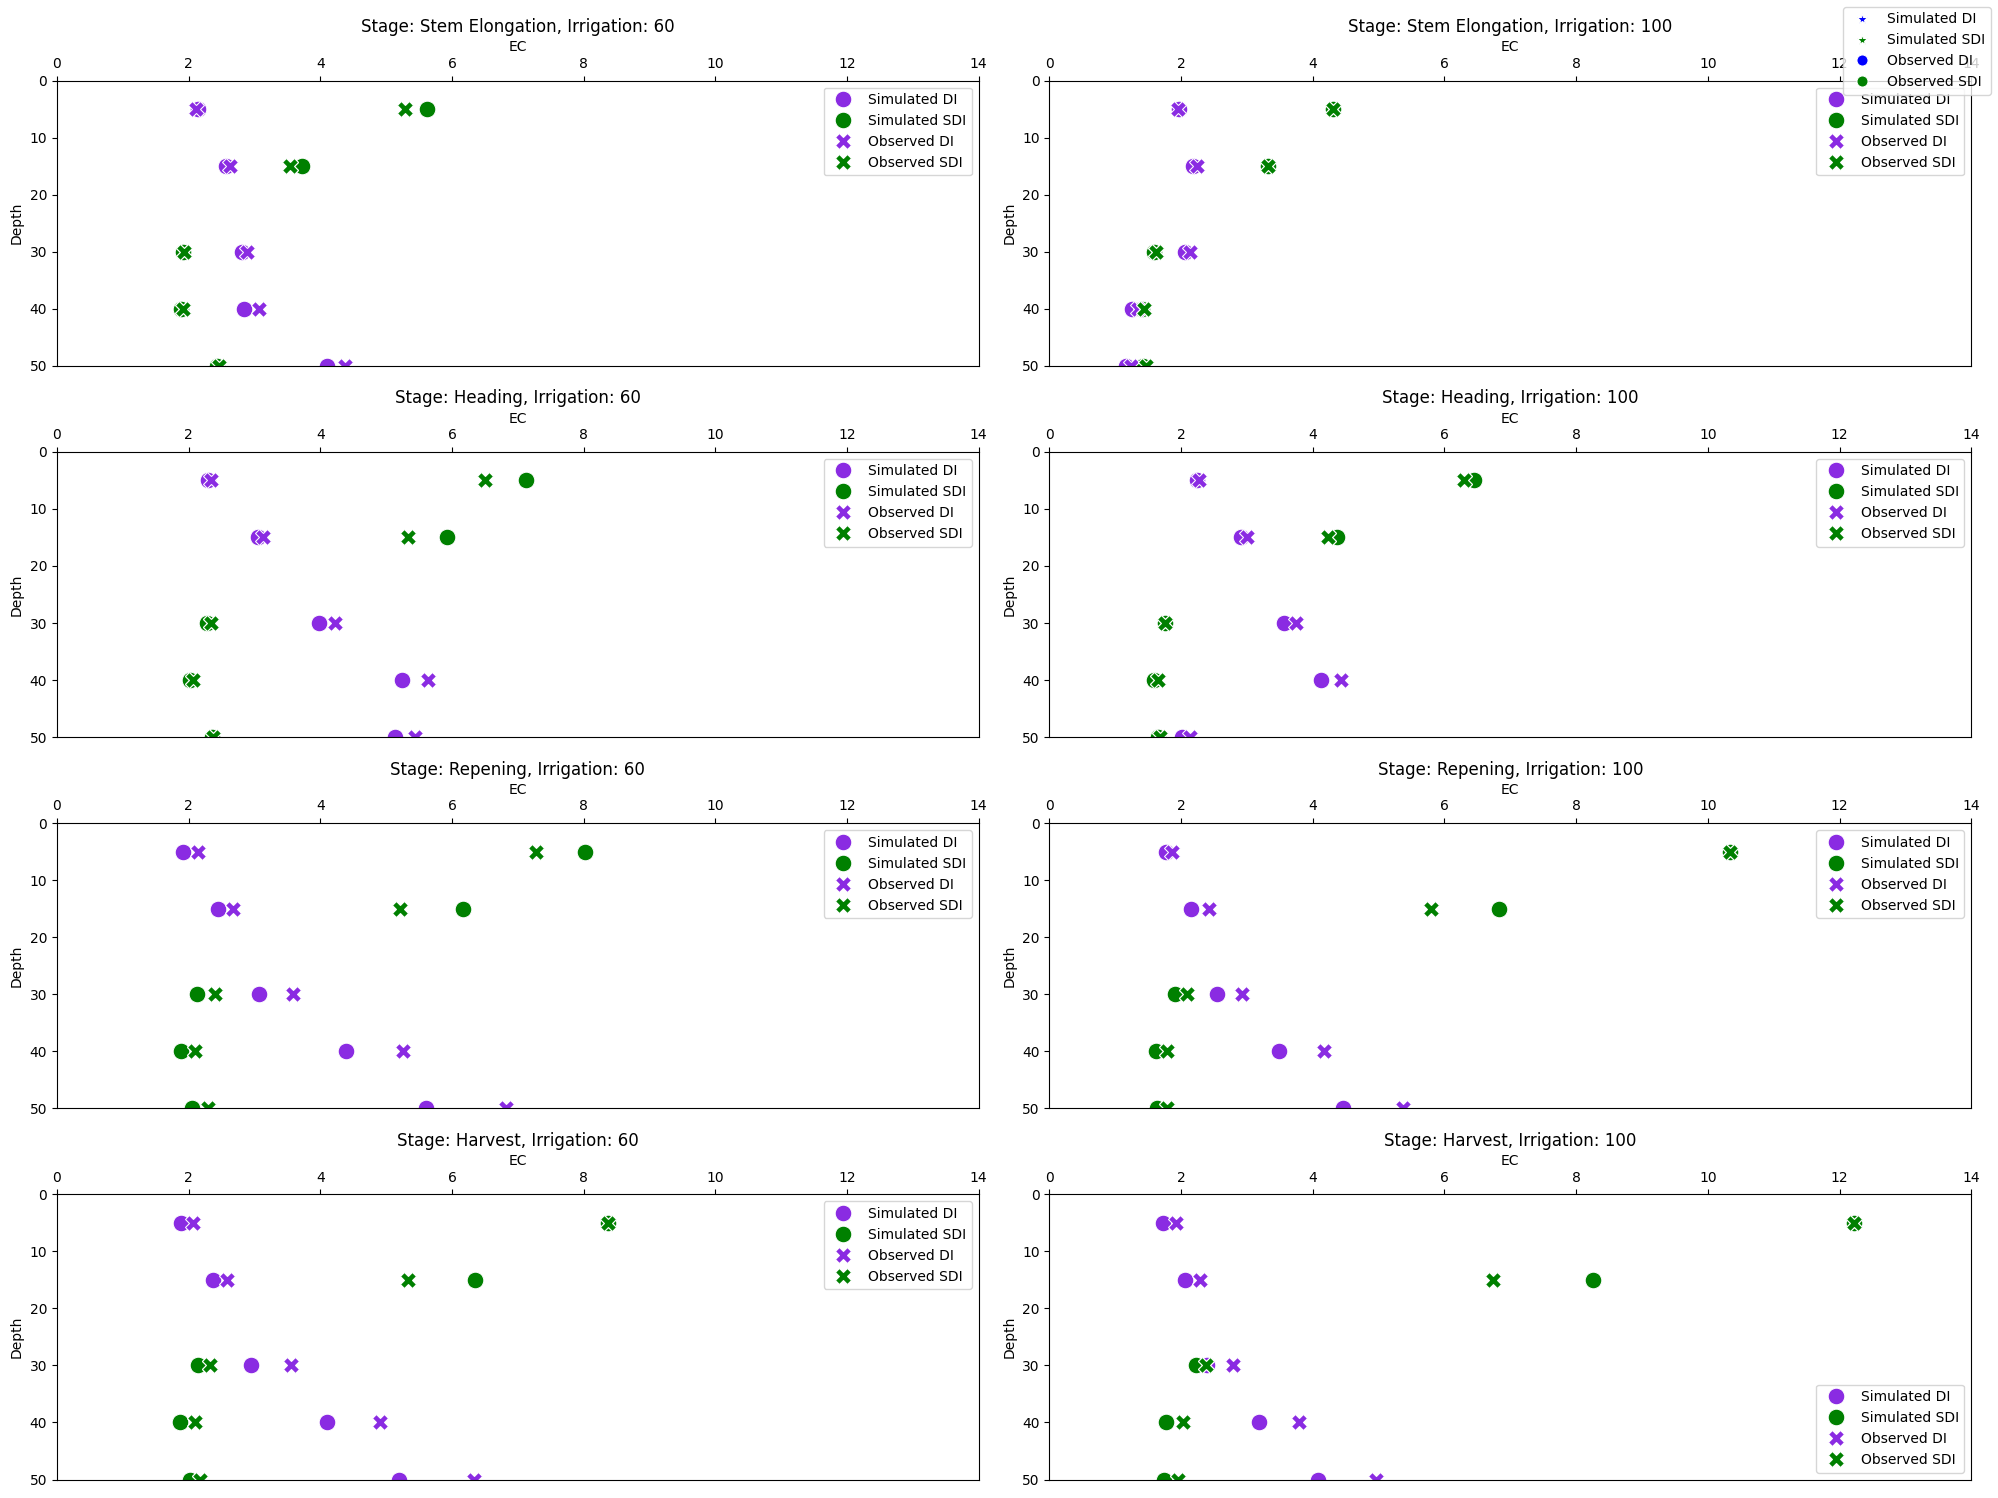

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the DataFrame and correct the column name
df = pd.read_excel("Updated_EC_Data_with_Labels.xlsx")
df.rename(columns={'Type _of_Data': 'Type_of_Data'}, inplace=True)

# Extract unique growth stages and irrigation labels
growth_stage = df['Growth_Stage'].unique()
irrigation_labels = df['Irrigation_Label'].unique()

# Debugging: Check if growth stages and irrigation labels are extracted
print("Growth stages:", growth_stage)
print("Irrigation labels:", irrigation_labels)

# Create a figure and set of subplots
fig, axes = plt.subplots(len(growth_stage), len(irrigation_labels), figsize=(20, 15), sharey=False, sharex=False)
if len(growth_stage) * len(irrigation_labels) == 1:
    axes = [axes]  # Ensure axes is iterable if only one subplot

# Debugging: Check if axes are created
print("Number of axes:", len(axes))



# Flatten the axes array for easy iteration
axes = axes.flatten()

# Counter for axes index
ax_index = 0

for stage in growth_stage:
    for label in irrigation_labels:
        ax = axes[ax_index]
        # Filter the data for specific growth stage and irrigation label
        stage_label_data = df[(df['Growth_Stage'] == stage) & (df['Irrigation_Label'] == label)]

        # Debugging: Check if filtered data is empty
        if stage_label_data.empty:
            print(f"No data for Stage: {stage}, Label: {label}")
            continue

        # Iterate over type of data and irrigation method to plot
        for type_data in ['Simulated', 'Observed']:
            for method in ['DI', 'SDI']:
                method_data = stage_label_data[(stage_label_data['Type_of_Data'] == type_data) &
                                               (stage_label_data['Irrigation_Method'].str.contains(method))]
                if method_data.empty:
                    print(f"No data for {type_data}, {method} in Stage: {stage}, Label: {label}")
                    continue
                method_data_sorted = method_data.sort_values('EC')

                # Define color and marker based on type and method
                color = 'blueviolet' if method == 'DI' else 'green'  # Blue for DI, green for SDI
                marker = 'o' if type_data == 'Simulated' else 'X'  # Asterisk for Simulated, circle for Observed

                #sns.relplot(x='EC', y='Depth', data=method_data_sorted, hue="Irrigation_Method", style="Type_of_Data",
                               #dashes=False, markers=True)

                # Plot using seaborn for better style control
                sns.lineplot(x='EC', y='Depth', data=method_data_sorted, ax=ax, color=color,
                            linestyle='', marker=marker, markersize=12, label=f'{type_data} {method}')

        ax.set_title(f'Stage: {stage}, Irrigation: {label}')
        ax.invert_yaxis()
        ax.set_xlim([0, 13])
        ax.set_ylim([50, 0])
        ax.xaxis.set_label_position('top')
        ax.xaxis.tick_top()
        ax.set_xticks(ax.get_xticks())  # Ensure all x-axis numbers are shown

        # Increment the axes index
        ax_index += 1

# Adjust layout and add a legend
plt.tight_layout()
#if ax_index > 0:  # Ensure at least one plot was made
#handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()


NameError: name 'colors' is not defined

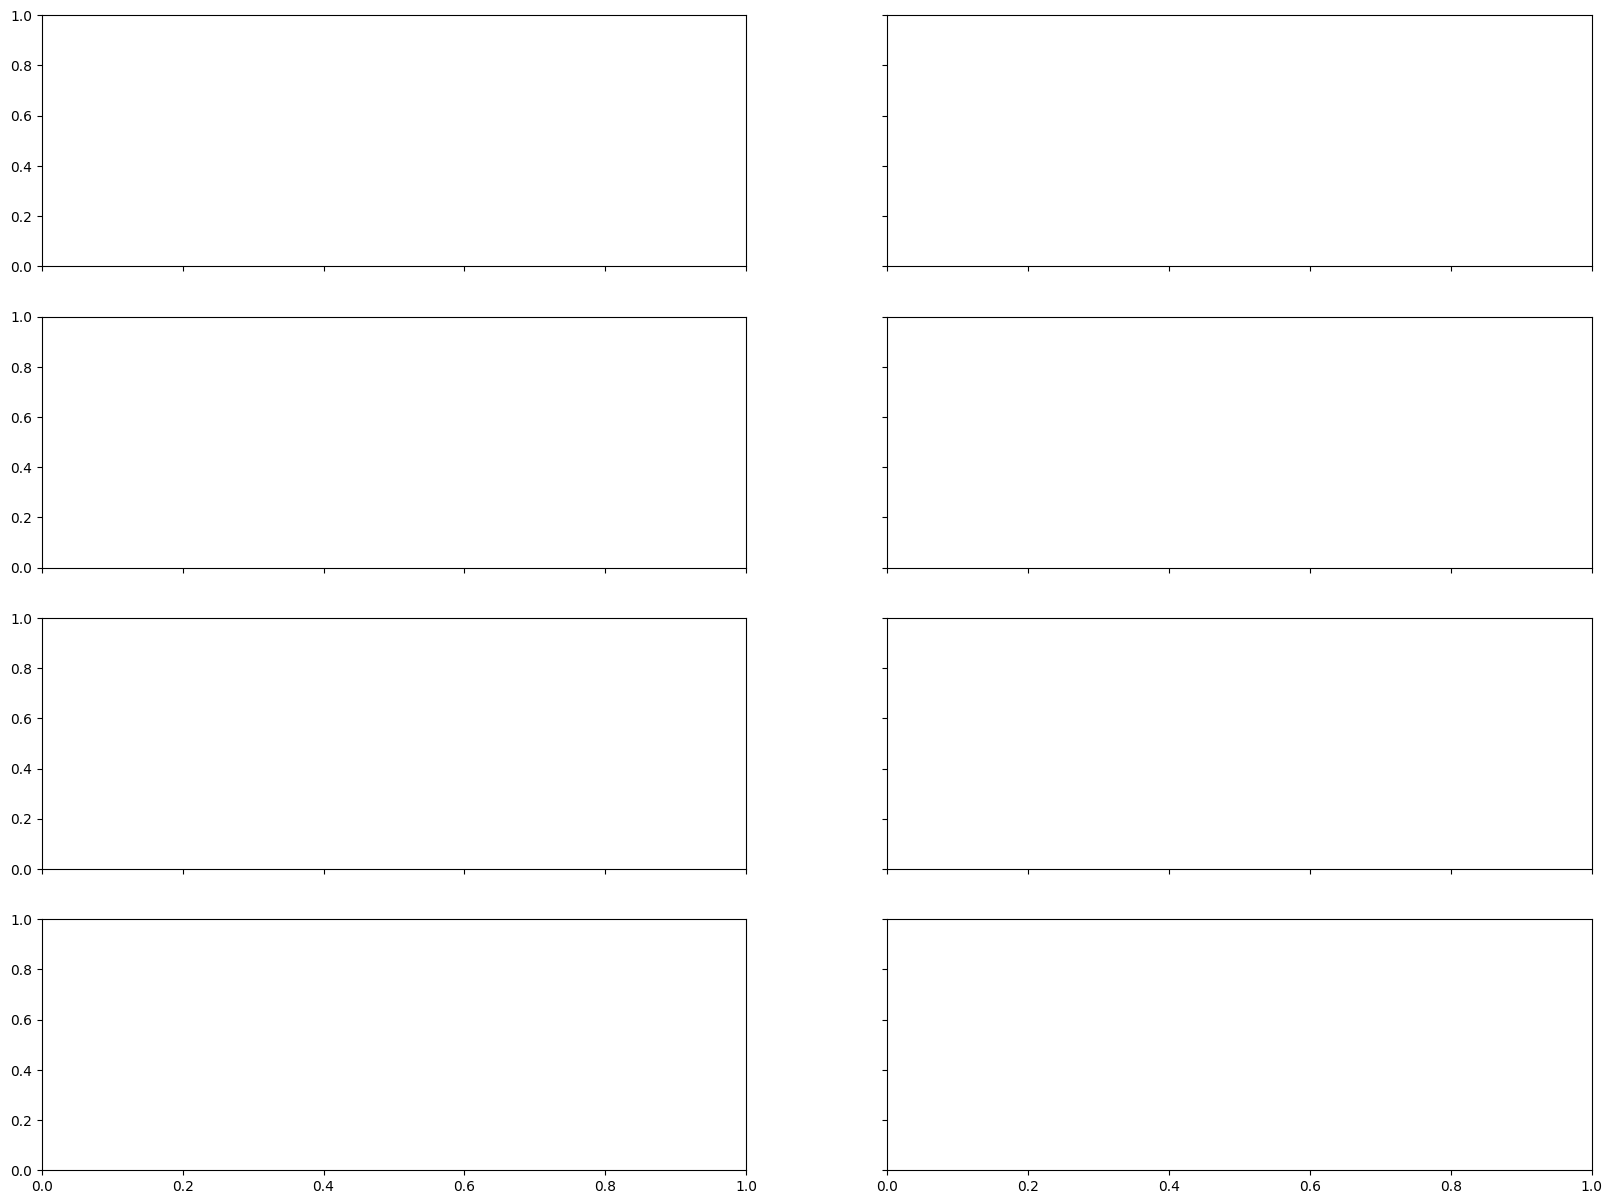

In [61]:
# Filter the data to include only the specified depths
filtered_depths = [5, 15, 30, 40, 50]
df_filtered = df[df['Depth'].isin(filtered_depths)]

# Create a figure and set of subplots
fig, axes = plt.subplots(len(growth_stage), len(irrigation_labels), figsize=(20, 15), sharey=True, sharex=True)
if len(growth_stage) * len(irrigation_labels) == 1:
    axes = [axes]  # Ensure axes is iterable if only one subplot

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Counter for axes index
ax_index = 0

for stage in growth_stage:
    for label in irrigation_labels:
        ax = axes[ax_index]
        # Filter the data for specific growth stage and irrigation label using the filtered dataset
        stage_label_data = df_filtered[(df_filtered['Growth_Stage'] == stage) & (df_filtered['Irrigation_Label'] == label)]

        # Iterate over type of data and irrigation method to plot
        for type_data in ['Simulated', 'Observed']:
            for method in ['DI', 'SDI']:
                method_data = stage_label_data[(stage_label_data['Type_of_Data'] == type_data) &
                                               (stage_label_data['Irrigation_Method'].str.startswith(method))]
                if method_data.empty:
                    print(f"No data for {type_data}, {method} in Stage: {stage}, Label: {label}")
                    continue
                method_data_sorted = method_data.sort_values('Depth')

                # Define color and marker based on type and method
                color = colors[(type_data, method)]
                marker = '*' if type_data == 'Simulated' else 'o'  # Asterisk for Simulated, circle for Observed

                # Plot using seaborn for better style control
                sns.lineplot(x='EC', y='Depth', data=method_data_sorted, ax=ax, color=color,
                             linestyle='-', marker=marker, markersize=8, label=f'{type_data} {method}')

        ax.set_title(f'Stage: {stage}, Irrigation: {label}')
        ax.invert_yaxis()  # Inverts the y-axis so depth increases downwards
        ax.set_xlim([0, 13])  # Set the range of EC values on x-axis
        ax.set_ylim([50, 0])  # Set the range of Depth values
        ax.xaxis.set_label_position('top')  # X-axis labels on top
        ax.xaxis.tick_top()  # X-axis ticks on top

        # Increment the axes index
        ax_index += 1

# Adjust layout and add a legend
plt.tight_layout()
if ax_index > 0:  # Ensure at least one plot was made
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')
plt.show()
